### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')
print(df.head(10))


   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [3]:
display(df.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

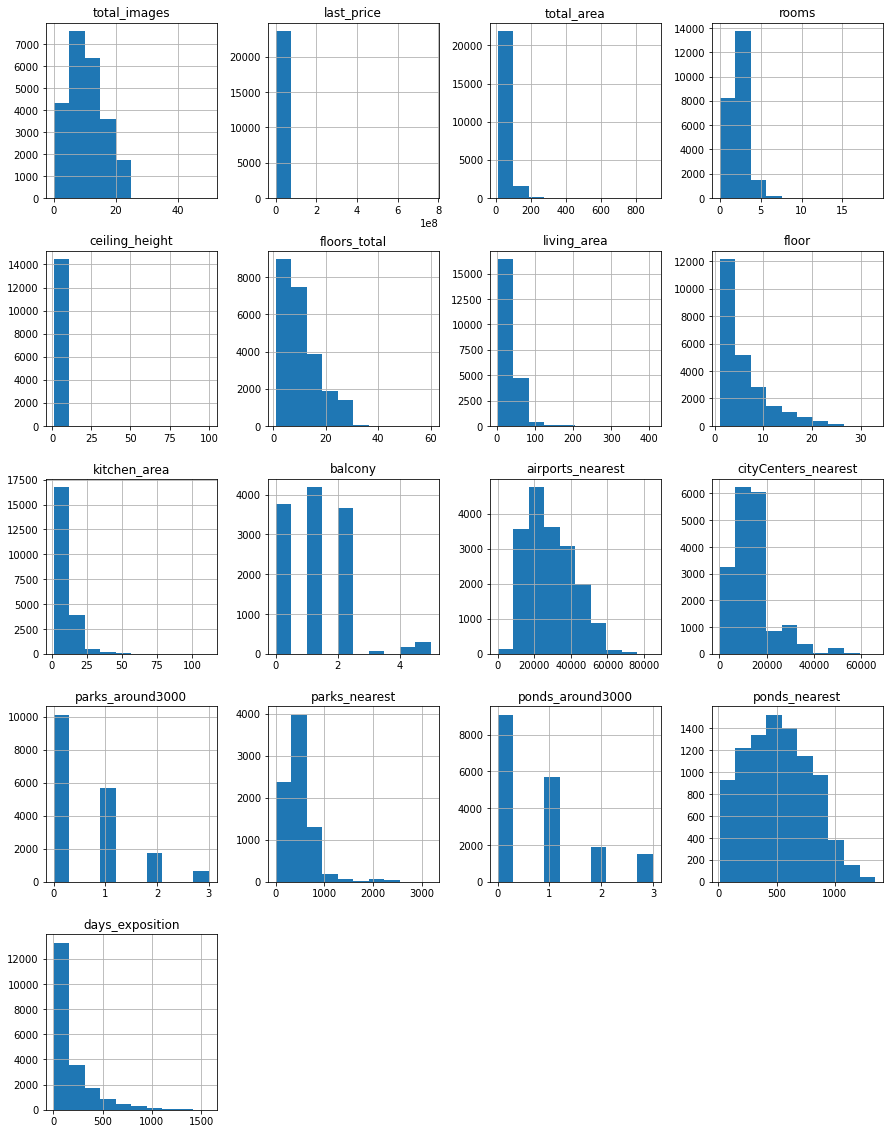

In [5]:
df.hist(figsize=(15, 20));

Распределение на гистограммах кажется вполне нормальным. За исключением гистограммы "балконы", там присутствуют аномальные значения.

#### Промежуточный вывод
Из полученных данных методом info, видно,что у нас есть пропущенные данные в следующих позициях:
 * ceiling_height- высота потолков (м).
 * floors_total- всего этажей в доме.
 * living_area- жилая площадь в квадратных метрах (м²).
 * kitchen_area- площадь кухни в квадратных метрах (м²).


Здесь можно заполнить пропуски медианой. Среднее будет не совсем корректно,так как ,глядя на вывод метода describe, можно заметить,что есть кваритры с аномальными значениями в данных колонках.


* is_apartment- апартаменты (булев тип).
* balcony- число балконов.


Если пользвователь не указал апартаменты и количество балконов. Вероятнее всего в его квартире попросту нет балконов и она не является апартаментами. Поэтому заполним пропуски исходя из данного вывода.


* locality_name- название населённого пункта.


Пропущенных значений не так много 300 из почти 24000 (~1,26%). Оставим так как есть.


* airports_nearest- расстояние до ближайшего аэропорта в метрах (м).


 В Питере один гражданский аэропорт.Можно сгруппировать пропущенные данные с колонкой расстояние до центра. У столбоцов с пропущенными значениями, что максимально близко к центру, укажем расстояние до аэропорта, как расстояние от центра до Пулково. 
 
 
* parks_around3000- число парков в радиусе 3 км.
* ponds_around3000- число водоёмов в радиусе 3 км.


Максимальным в данных столбцах является число 3, можно преположить, что пропущенные значения, те, где больше трех парков и водоемов, но нет подтверждений этому, поэтому оставим так как есть.
 
 
* parks_nearest- расстояние до ближайшего парка (м).
* ponds_nearest- расстояние до ближайшего водоёма (м).
 
 
 Заполненных значений в parks_around3000/ponds_around3000 около 18 000, а в parks_nearest/ponds_nearest около 9000. Что-то не сходится. Можно заполнить пропущенные значения расстоянием 3000, если данные присутствуют в колонке количетсва парков/водоёмов.


* days_exposition- сколько дней было размещено объявление (от публикации до снятия).


Пропущенные значения объясняются тем, что объявление еще не сняли.



 Также предстоит разобраться с дубликатами и привести в порядок типы данных- где-то он не подходящий, где-то изменение необходимо для оптимизации.


### Предобработка данных

#### Пропуски
Преобразуем пропуски:

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
#df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
#df['living_area'] = df['living_area'].fillna(df['living_area'].median())
#df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['is_apartment'] = df['is_apartment'].fillna(0)
df['balcony'] = df['balcony'].fillna(0)
#damn = df[df['cityCenters_nearest']<3000]
#damn[damn['airports_nearest'].isnull() == True]- теория с заполнением пропусков для квартир находящихся близко к центру провалилась.

df['parks_nearest'] = df[df['parks_around3000'] != 0]['parks_nearest'].fillna(3000)#добавляем расстояние 3000 м для позиций где парк есть в предлах до 3 км, но нет значения в колонке расстояние до парка..
df['ponds_around3000'] = df[df['ponds_around3000'] != 0]['ponds_nearest'].fillna(3000)#аналогично для водоемов.
#df.info()


#### Дубликаты
Теперь займемся дубликатами:
* посмотрим присутствуют ли явные дубликаты в датасете
* проработаем столбец locality_name

In [7]:
print(df.duplicated().sum())# проверим DataFrame на явные дубликаты
df['locality_name'] = df['locality_name'].str.lower()# приведем все значение к нижнему регистру
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('городской посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('городской поселок','поселок')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа','поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','поселок')
#len(df['locality_name'].unique()) 323 строки вместо 365. Методом replace мы избавились от тавтоогии в столбце locality_name
#df['locality_name'].unique()

0


#### Типы данных
Произведем обработку типов данных:
* во-первых поменяем тип с float на int, где это возможно. Так как int затрачивает меньше памяти.
* во-вторых поменяем is_apartment на тип данных bool и first_day_exposition на datatime.

In [8]:
df = df.astype({ "is_apartment": "bool", "first_day_exposition": "datetime64"})
name = ['last_price','floor','balcony']
for i in name:
    df[i] = df[i].astype('int64')
#df['floors_total'] = df['floors_total'].astype('int64')

#df.info() #удалось сократить размер  затрачиваемой памяти с 3.7 до 3.5 Mb

#### Аномальные значения

Попытаемся выявить аномальные значения по каждому столбцу:
* удалим аномально большие значения высот потолков
* в питере максимальная этажность жилых зданий равна 37, удалим все значения больше указанного
* с помощью правила 3 сигм избавимся от аномальных значений в колонках rooms,total_area,last_price


In [9]:
df_new = df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df['ceiling_height']/10
df_new = df.drop(df[df['floors_total'] > 37].index)
df_new['rooms'].describe()
print(f'По правилу трех сигм 99% всех значений rooms находятся в инервале:  до {2.070684+3*1.078428} комнат')
df_new = df_new[df_new['rooms']<6]
df_new['total_area'].describe()
print(f'По правилу трех сигм 99% всех значений total_area находятся в инервале:  до {58.881943+3*30.205080} кв.м')
df_new = df_new[df_new['total_area']<150]
df_new['last_price'].describe()
print(f'По правилу трех сигм 99% всех значений last_price находятся в инервале:  до {5.675278e+06+3*4.493906e+06} млн.руб')
df_new = df_new[df_new['last_price']<19160000]
print(df_new.shape[0]/df.shape[0]) # меньше 5 %- все отлично
df_new.reset_index(drop=True)


По правилу трех сигм 99% всех значений rooms находятся в инервале:  до 5.305968 комнат
По правилу трех сигм 99% всех значений total_area находятся в инервале:  до 149.497183 кв.м
По правилу трех сигм 99% всех значений last_price находятся в инервале:  до 19156996.0 млн.руб
0.95835267310857


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,755.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.00,2,поселок шушары,12817.0,18603.0,0.0,NaN,NaN,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,574.0,574.0,558.0
3,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,48.0,48.0,121.0
4,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,9.10,0,поселок янино-1,NaN,NaN,NaN,3000.0,3000.0,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22707,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,санкт-петербург,24665.0,4232.0,1.0,796.0,381.0,381.0,NaN
22708,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.50,0,тосно,NaN,NaN,NaN,3000.0,3000.0,NaN,45.0
22709,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,NaN,0,село рождествено,NaN,NaN,NaN,3000.0,3000.0,NaN,NaN
22710,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2,санкт-петербург,39140.0,10364.0,2.0,173.0,196.0,196.0,602.0


### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
* new_price- цена одного квадратного метра;
* week_day- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* month_exposition- месяц публикации объявления;
* year_exposition- год публикации объявления;
* type_floor- тип этажа квартиры (значения — «первый», «последний», «другой»);
* cityCenters_km- расстояние до центра города в километрах (переведем из м в км и округлим до целых значений).


In [10]:
df_new['new_price'] = df_new['last_price']/df_new['total_area']
df_new['week_day'] = df_new['first_day_exposition'].dt.weekday
df_new['month_exposition'] = df_new['first_day_exposition'].dt.month
df_new['year_exposition'] = df_new['first_day_exposition'].dt.year

def type_f (row): # создадим функцию которая разобьет нам этажность на категории
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df_new['type_floor'] = df_new.apply(type_f,axis=1)#добавим новый столбец с категориями в зависимости от этажа
df_new['cityCenters_km'] = df_new['cityCenters_nearest']/1000
df_new['cityCenters_km'] = df_new['cityCenters_km'].round(decimals=0)
display(df_new)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_price,week_day,month_exposition,year_exposition,type_floor,cityCenters_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,755.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,NaN,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,574.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,48.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,3000.0,3000.0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,381.0,381.0,NaN,72490.845228,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,3000.0,3000.0,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,3000.0,3000.0,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,173.0,196.0,196.0,602.0,149511.400651,1,3,2017,другой,10.0


### Исследовательский анализ данных

#### Анализ гистограмм по столбцам
Построим отдельные гистограммы для каждого из параметров указанных ниже и опишем наблюдения.
Параметры объектов для изучения:

* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.


count    22712.000000
mean        55.436288
std         21.414425
min         12.000000
25%         39.600000
50%         50.700000
75%         66.300000
max        149.200000
Name: total_area, dtype: float64

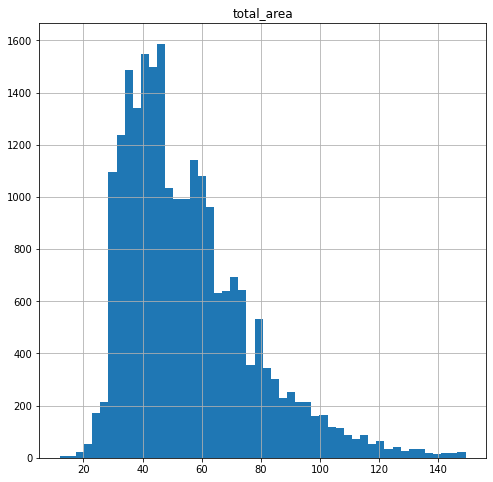

In [11]:
display(df_new['total_area'].describe())
df_new.hist('total_area',bins=50,grid=True,figsize=(8,8));

Теперь датасет гораздо лучше очищен от аномалий. Пик графика приходится на 40  с небольшим квадратов. Основная масса квартир сосредоточена в промежутке от 30 до 120 кв.м. Распределение предсталено со смещением.

count    20927.000000
mean        31.752608
std         14.685165
min          2.000000
25%         18.400000
50%         30.000000
75%         41.000000
max        128.000000
Name: living_area, dtype: float64

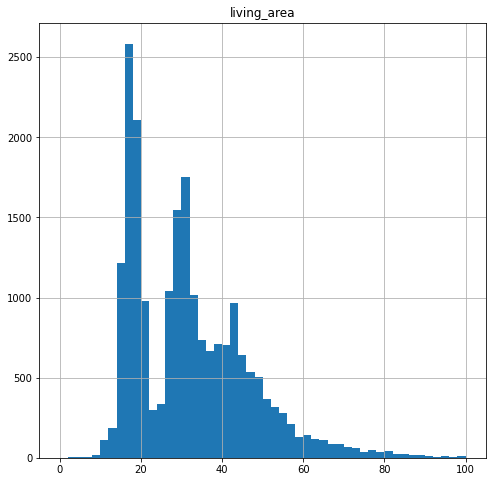

In [12]:
display(df_new['living_area'].describe())
df_new.hist('living_area',bins=50,range=(0,100),grid=True,figsize=(8,8));

Та же картина, гистограмма кажется необычной. Связано это с тем, что застройщик в большинстве своем строит студии с жилой площадью на 18 кв (бюджетный вариант для одиноких) и 34 кв (типовая однушка).

count    20543.000000
mean        10.003117
std          4.504856
min          1.300000
25%          7.000000
50%          9.000000
75%         11.400000
max         64.000000
Name: kitchen_area, dtype: float64

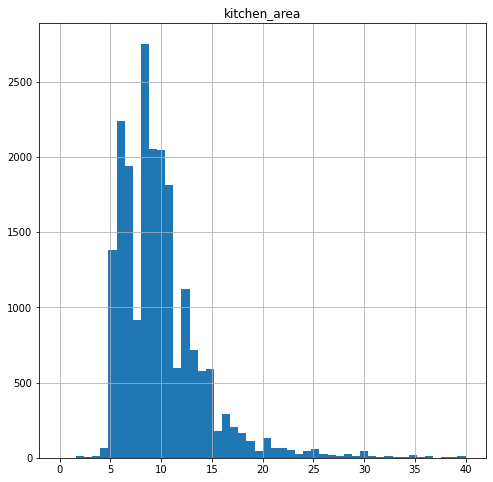

In [13]:
display(df_new['kitchen_area'].describe())
df_new.hist('kitchen_area',bins=50,range=(0,40),grid=True,figsize=(8,8));

Стандартное распределение по площади кухни с пиком в районе 9 км.м.

count    2.271200e+04
mean     5.295924e+06
std      3.000591e+06
min      1.219000e+04
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      1.915000e+07
Name: last_price, dtype: float64

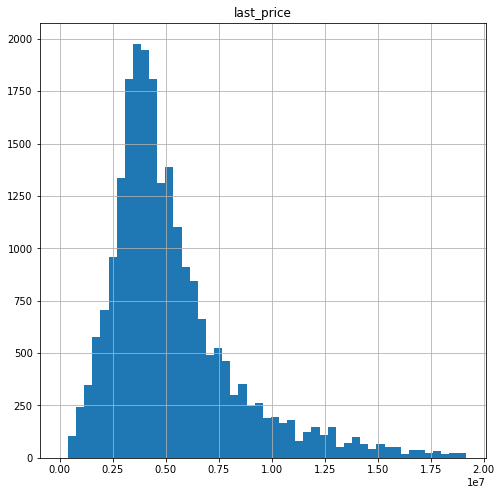

In [14]:
display(df_new['last_price'].describe())
df_new.hist('last_price',bins=50,grid=True,figsize=(8,8));#возьмем третий квартиль в качестве предела цены для того, чтобы график был более читаем

В большинстве своем цена на квартиры варьируется в диапазоне от 2 до 6,8 млн.руб

count    22712.000000
mean         1.977457
std          0.929425
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

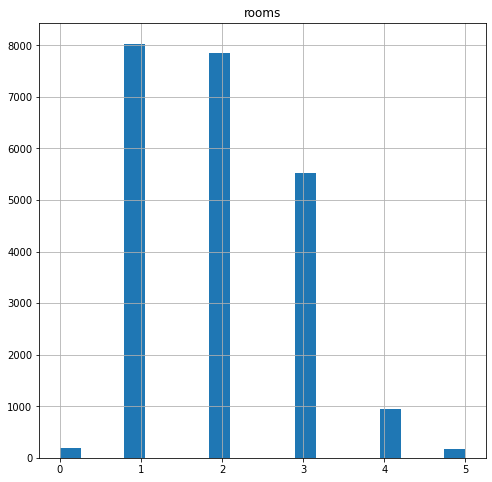

In [15]:
display(df_new['rooms'].describe())
df_new.hist('rooms',bins=19,grid=True,figsize=(8,8));

Количество комнат преобладает в пределах от 1 до 5. Странно, что есть квартиры где 0 комнат, либо это аномалия от которой надо избавиться, либо таким образом учитываются студии. Видно, что на 4,5-комнатные квартиры приходится всего лишь ~1000 объявлений.

count    22712.000000
mean         2.683943
std          0.215770
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

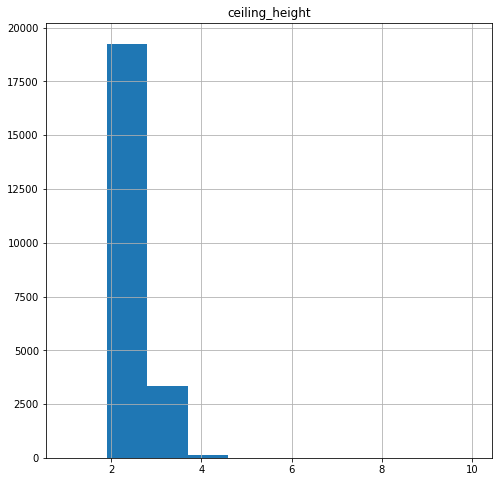

In [16]:
display(df_new['ceiling_height'].describe())
df_new.hist('ceiling_height',bins=10,grid=True,figsize=(8,8));

С высотой потолков все довольно понятно, в основном они от 2 до 3 метров.

count    22712.000000
mean         5.905424
std          4.909030
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

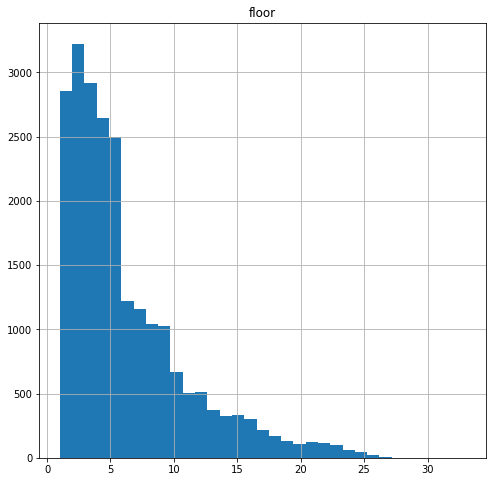

In [17]:
display(df_new['floor'].describe())
df_new.hist('floor',bins=33,grid=True,figsize=(8,8));

Этажность описывается распределением Пуасссона.

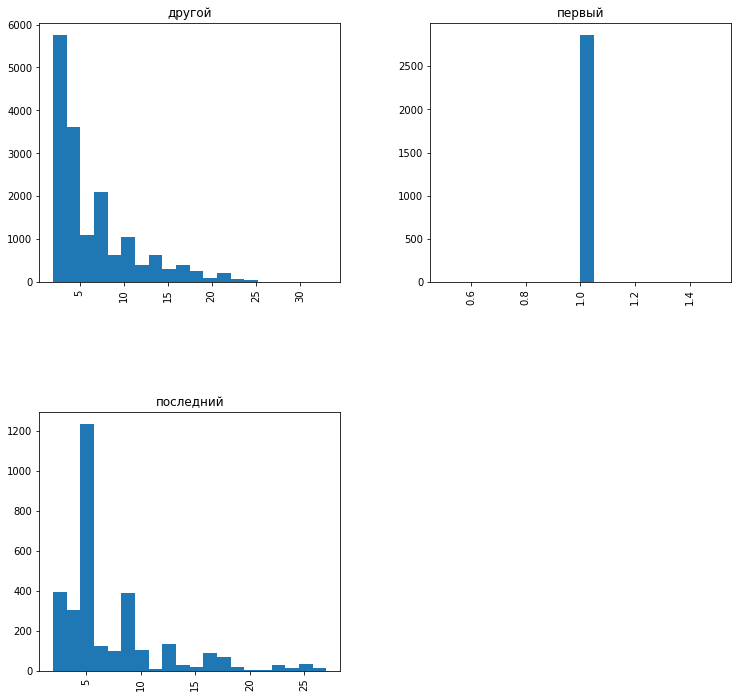

In [18]:
df_new.hist(column='floor', by='type_floor',bins=20,figsize=(12,12),grid=True);

Квартир на первом этаже свыше 2,5 тысяч, последний это в основном 5 и 8 этажи.

count    22630.000000
mean        10.767521
std          6.625904
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

floors_total
37.0       1
34.0       1
33.0       1
29.0       1
36.0       3
28.0      21
35.0      24
1.0       25
26.0     123
21.0     157
27.0     164
11.0     186
13.0     214
20.0     257
22.0     285
8.0      301
19.0     327
15.0     345
23.0     346
2.0      366
24.0     464
7.0      493
18.0     494
14.0     547
3.0      626
6.0      771
17.0     813
25.0    1058
4.0     1111
10.0    1131
12.0    1326
16.0    1334
9.0     3709
5.0     5605
Name: floors_total, dtype: int64

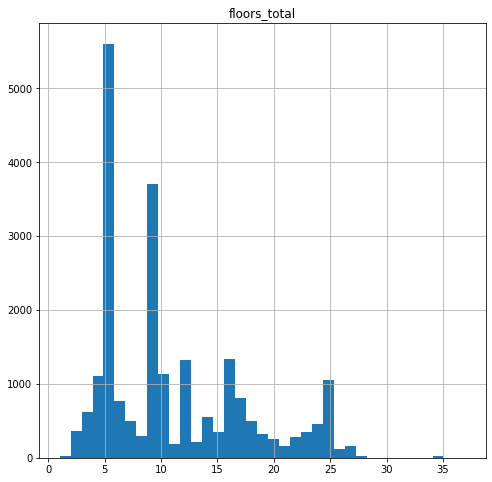

In [19]:
display(df_new['floors_total'].describe())
df_new.hist('floors_total',bins=37,grid=True,figsize=(8,8));
df_new.groupby('floors_total')['floors_total'].count().sort_values()

В Питере в основном строят дома с этажностью 4,5,9,10,12,16,25

count    17218.000000
mean     14588.403415
std       8539.092975
min        208.000000
25%      10001.500000
50%      13335.000000
75%      16503.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

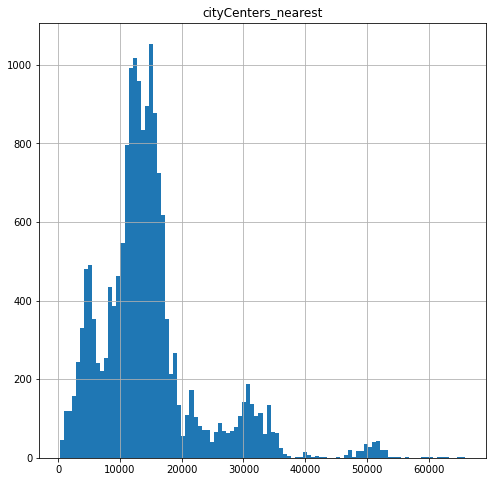

In [20]:
display(df_new['cityCenters_nearest'].describe())
df_new.hist('cityCenters_nearest',bins=100,grid=True,figsize=(8,8));

Судя по гистограмме на удалении в 50 км от центра много жилой недвижмости.

count    17201.000000
mean     28885.527411
std      12824.888016
min          0.000000
25%      18365.000000
50%      26944.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

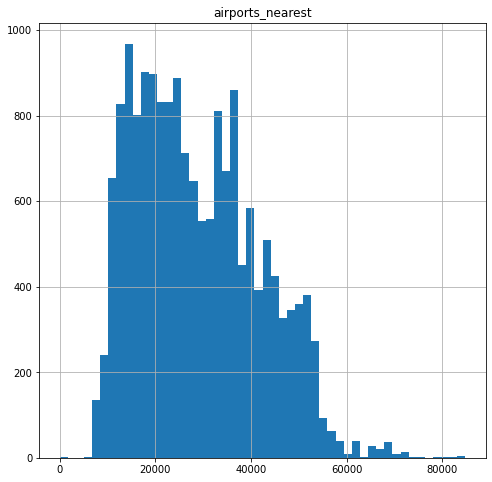

In [21]:
display(df_new['airports_nearest'].describe())
df_new.hist('airports_nearest',bins=50,grid=True,figsize=(8,8));

А вот квартиру рядом с аэропортом вряд ли получится купить.

count    12888.000000
mean      1561.580618
std       1265.816165
min          1.000000
25%        418.000000
50%        724.000000
75%       3000.000000
max       3000.000000
Name: parks_nearest, dtype: float64

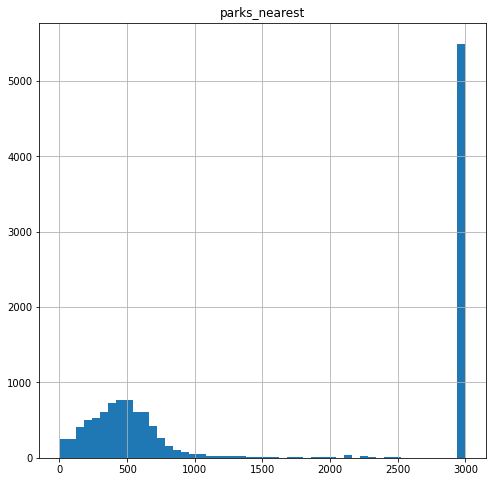

In [22]:
#df_new = df_new[df_new['parks_nearest']<3000]# решение добавить расстояние для парков исходя из их присутсвтивия в радиусе 3 км было не лучшим
display(df_new['parks_nearest'].describe())
df_new.hist('parks_nearest',bins=50,grid=True,figsize=(8,8));

Аномалия в области 3км связана с тем,что мы добавили парки где не было указано расстояние, но они присутствовали в столбце parks_pounds3000. в целом распределение нормальное, наблюдается пик в районе 500 м.

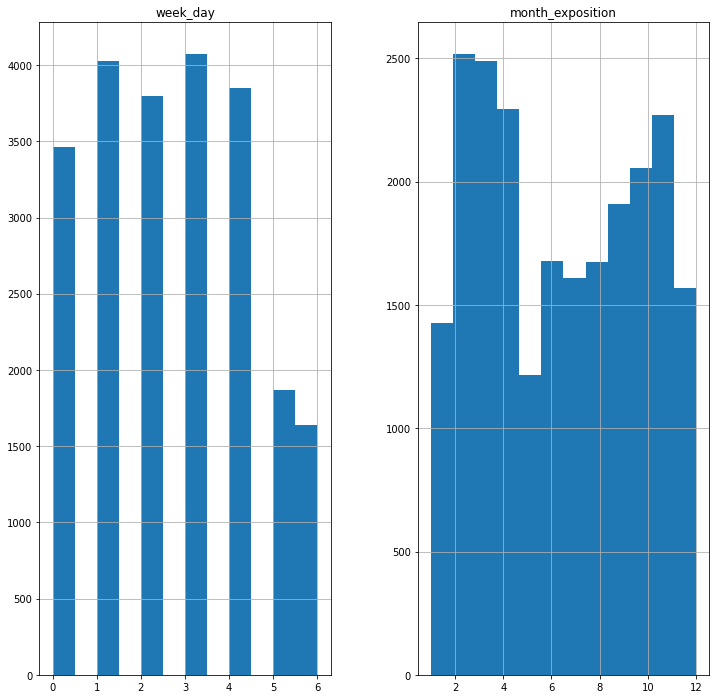

In [23]:
df_new.hist(column=['week_day','month_exposition'],bins=12,figsize=(12,12),grid=True);

В срезе недели меньше всего квартиры выставляют по выходным.Если смотреть в разрезе месяцев, то пик появления новых объявлений приходится на периоды: февраль-май, сентябрь-ноябрь.

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
* Построим гистограмму.
* Посчитем среднее и медиану.


count    19799.000000
mean       176.927572
std        215.684614
min          1.000000
25%         44.000000
50%         93.000000
75%        225.000000
max       1580.000000
Name: days_exposition, dtype: float64

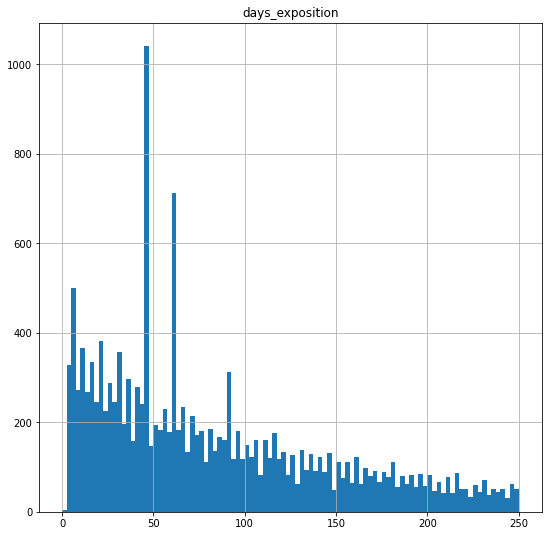

In [24]:
display(df_new['days_exposition'].describe())
df_new.hist('days_exposition',grid=True,range=(0,250),figsize=(9,9),bins=100);

На гистограмме прослеживается прямая отрицательная корреляция между количеством дней и вероятностью продажи квартиры(чем дней больше, тем меньше вероятность). Как видим из метода describe среднее количество дней, которое объявление висит на сайте - 180, медиана-95, такая разница в показателях обусловлена, на мой взгялд, неликвидными квартирами, которые продаются очень долго. На гистограмме также присутствуют пиковые значения, не понятно чем они обусловлены. Можно сказать что продажа является быстрой если она прошла в течение трех месяцев.Долгими же, являются, те что продовались больше 232 дней- таких 25% от общего количества.

Среднее теперь 176 дней, медиана-93.Долгими же, являются, те что продовались больше 225 дней- таких 25% от общего количества.


#### Факторы больше всего влияющие на общую (полную) стоимость объекта
 Изучим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
 
 
 Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией будем использовать сводные таблицы.

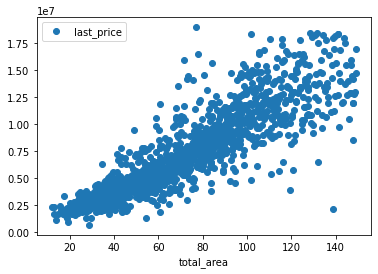

In [25]:
df_new.pivot_table(index='total_area',values='last_price',aggfunc='mean').plot(style='o');

На графике показана средняя цена жилья в зависимости от ее квадратуры. График напоминает квадратичную функцию,зависимость есть. С увелчением площади возрастает цена.

После очистки от аномалий изменился масштаб, сам график хоть и поменялся внешне, вывод остается корректным. Связь между ценой и площадью стала послеживаться еще четче.


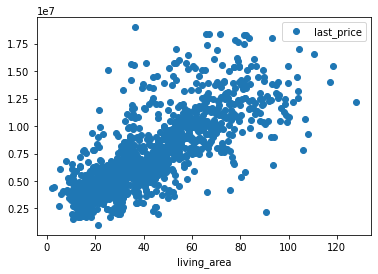

In [26]:
df_new.pivot_table(index='living_area',values='last_price',aggfunc='mean').plot(style='o');

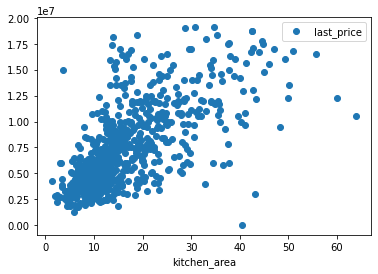

In [27]:
df_new.pivot_table(index='kitchen_area',values='last_price',aggfunc='mean').plot(style='o');


Все то же. Но выбивающихся значении практически нет. 

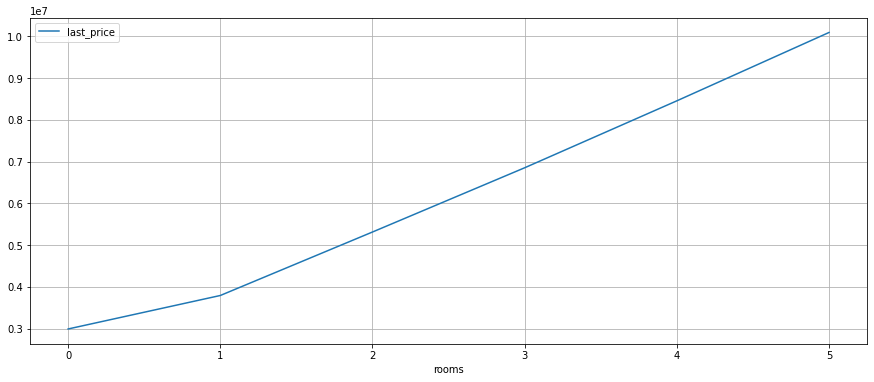

In [28]:
df_new.pivot_table(index='rooms',values='last_price',aggfunc='mean').plot(grid=True,figsize=(15,6));


Зависимость цены от числа комнат после роста, идет на спад от двух и более комнат. Далее наблюдается рост цен на квартиру от 10 комнат.

In [29]:
display(df_new['last_price'].corr(df_new['total_area']))
display(df_new['last_price'].corr(df_new['living_area']))
display(df_new['last_price'].corr(df_new['kitchen_area']))
display(df_new['last_price'].corr(df_new['rooms']))

0.7583096010231826

0.6342669587622686

0.5599646486514059

0.4727406584557463

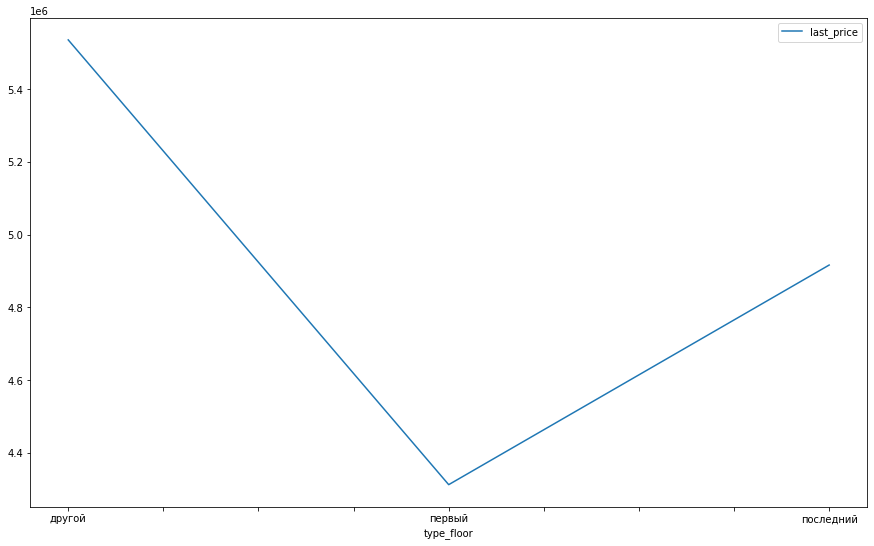

In [30]:
df_new.groupby('type_floor')['last_price'].mean().plot(figsize=(15,9),legend=True);

Самый дешевый ценник на квартиры первого этажа.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22712 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22712 non-null  int64         
 1   last_price            22712 non-null  int64         
 2   total_area            22712 non-null  float64       
 3   first_day_exposition  22712 non-null  datetime64[ns]
 4   rooms                 22712 non-null  int64         
 5   ceiling_height        22712 non-null  float64       
 6   floors_total          22630 non-null  float64       
 7   living_area           20927 non-null  float64       
 8   floor                 22712 non-null  int64         
 9   is_apartment          22712 non-null  bool          
 10  studio                22712 non-null  bool          
 11  open_plan             22712 non-null  bool          
 12  kitchen_area          20543 non-null  float64       
 13  balcony         

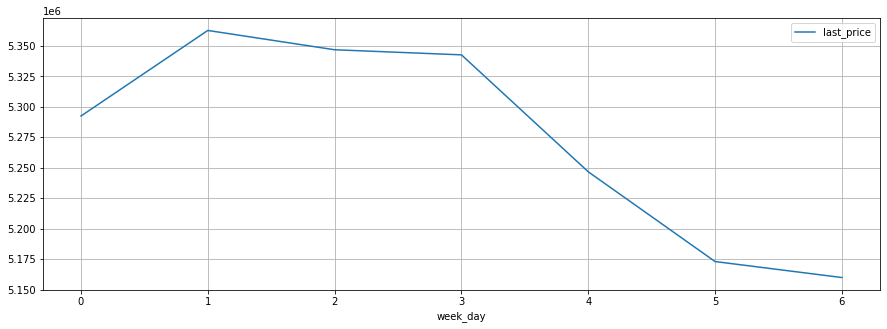

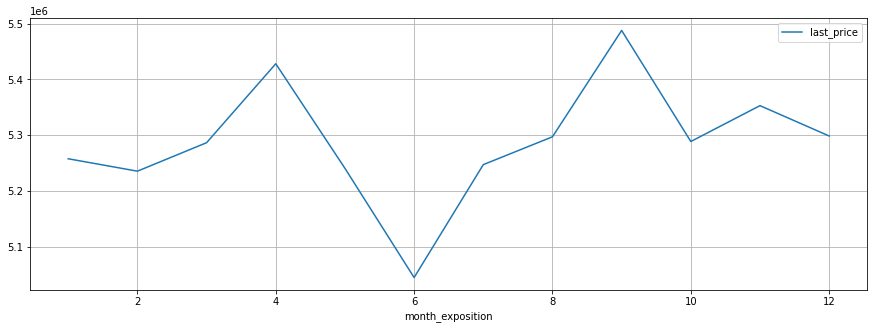

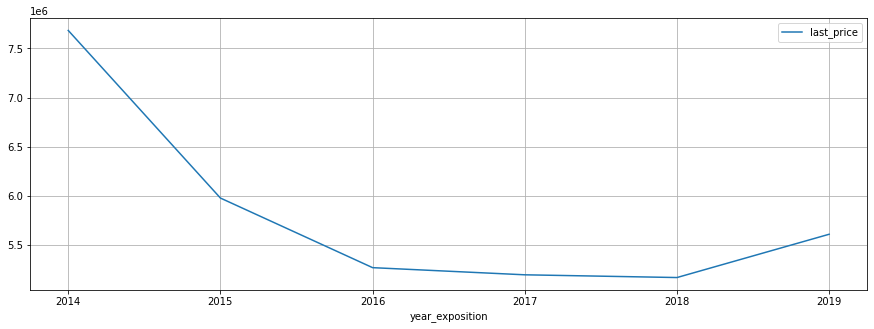

In [31]:
df_new.info()
df_new.pivot_table(index='week_day',values='last_price',aggfunc='mean').plot(grid=True,figsize=(15,5));
df_new.pivot_table(index='month_exposition',values='last_price',aggfunc='mean').plot(grid=True,figsize=(15,5));
df_new.pivot_table(index='year_exposition',values='last_price',aggfunc='mean').plot(grid=True,figsize=(15,5));

**Week:** квартиры с наименьшим ценником выставлялись в воскресенье. Выставленные квартиры после чт идут на спад в цене.

**Month:** в феврале, июне и октябре наблюдаюстся просадки по стоимости выкладываемых квартир.  

**Year:** с 2014 года цены на квартиры стремително падали, далее шла стагнация в период 2016-2018. Затем поледовал незначительный рост.

#### Расчет средней стоимости квадратного метра
Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [32]:
df_new['price_1m'] = df_new['last_price']/df_new['total_area']
df_new_grouped = df_new.groupby(['locality_name']).agg({'locality_name':'count','price_1m':'mean'})
df_new_grouped = df_new_grouped.rename_axis('index1').reset_index()
display(df_new_grouped.sort_values(by='locality_name').tail(10))
display(df_new_grouped.min())
display(df_new_grouped.max())

,index1,locality_name,price_1m
4,выборг,235,58075.893731
43,деревня кудрово,299,92473.547576
6,гатчина,307,68746.146763
218,поселок парголово,326,90332.263023
118,колпино,337,75333.295801
296,пушкин,355,101948.681398
3,всеволожск,396,67259.384320
291,поселок шушары,440,78677.364217
207,поселок мурино,556,85681.762601
302,санкт-петербург,14781,108657.633095


index1           бокситогорск
locality_name               1
price_1m         11206.221198
dtype: object

index1            шлиссельбург
locality_name            14781
price_1m         108657.633095
dtype: object


В таблице представлены топ-10 населенных пунктов по количеству объявлений и средняя цена одного квадрата жилой недвижимости по этим населенным пунктам. Самая высокая цена во всем датасете в Сестрорецке- средняя стоимость одного квадрата 112 тыс.руб. Самая дешевая в Зеленогорске- 67 тыс.руб


#### Расчет средней цены каждого километра
Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Сделаем вывод, как стоимость объектов зависит от расстояния до центра города.

,last_price
cityCenters_km,
0.0,9.248333e+06
1.0,1.006116e+07
2.0,9.419922e+06
3.0,8.495561e+06
4.0,9.005219e+06
5.0,8.943187e+06
6.0,8.271108e+06
7.0,7.677916e+06
8.0,7.765472e+06


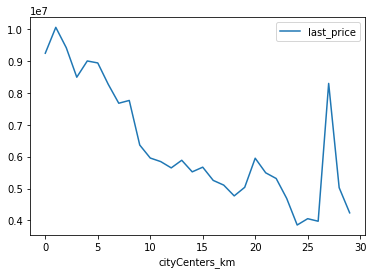

In [33]:
df_new.query('locality_name=="санкт-петербург"').pivot_table(index='cityCenters_km',values='last_price',aggfunc='mean').plot()
df_new.query('locality_name=="санкт-петербург"').pivot_table(index='cityCenters_km',values='last_price',aggfunc='mean')

Ценник на квадратный метр падает с удалением от центра столицы. Также наблюдается подъем цены на удалении 4-6 км и 27-29 км. .Возможно на этом удалении от центра стоят премиальные ЖК.Резкий спад на 8 км можно связать с облилием предложений

>Ценник показывает спад с удалением от центра, ярко выражены пики на 20 и 27 км. связать это можно все с тем же- прем. ЖК.


### Общий вывод

**В проекте мы проанализировани следующие параметры объектов:**
 
* общая площадь-  Пик квартир приходится на 40  с небольшим квадратов. Основная масса недвижиости сосредоточена в промежутке от 30 до 120 кв.м. Распределение предсталено со смещением.
* жилая площадь- были обнаружены пики в районе ~18 и ~34 кв.м
* площадь кухни- 75% квартир имеют площадь кухни до 11 кв.м
* цена объекта- медианный ценник на квартиры-4.5 млн, средний-5.2 млн. Средний ценник с аномалиями составлял 6.5 млн. Разница говорит сама за себя. Большинство квартир в диапозоне от 2,5 до 17,5 млн.
    
* количество комнат- Основной костяк недвижимости это 1-3 комнатные квартиры. На 4,5-комнатные квартиры приходится всего лишь ~1000 объявлений.
* высота потолков- ~2.6 м стандарт высоты питерских потолков.
* этаж квартиры - 75% квартир расположены в пределах 8 этажей.
* тип этажа квартиры- квартир на первом этаже свыше 2,5 тысяч, последний этаж- это в основном 5, таких квартир свыше 1.2 тыс.
* общее количество этажей-  4,5,9,12,16. Это первая пятерка по колчисетву объявлений, их больше 13 тыс.
* расстояние до центра города -средняя удаленность 14 км.
* расстояние до ближайшего аэропорта- вы наврятли найдете квартиру вблизи аэропорта и на удаленности 60 км это гораздо труднее сделать.
* расстояние до ближайшего парка- большинство квартир находится в радиусе 600 м от парка
* день и месяц публикации объявления-  меньше всего квартиры выставлялись по выходным.Пик появления новых объявлений приходится на периоды: февраль-середина апреля, сентябрь-ноябрь.

**Подтвердили гипотезу- чем дольше квартира находится в продаже, тем меньше вероятности,что ее купят**

Гистограмма показала прямую зависимость "вероятность покупки/количество дней в продаже".
Среднее количество дней, которое объявление висит на сайте - 176, медиана-93, такая разница в показателях обусловлена, на мой взгялд, неликвидными квартирами, которые продаются очень долго. Можно сказать что продажа является быстрой, если она прошла в течение трех месяцев.Долгими же, являются, те что продавались больше 225 дней- таких менее 25% от общего количества.

**Рассмотрели какие факторы больше всего влияют на общую (полную) стоимость объекта**
* общей площади
* жилой площади
* площади кухни
* количества комнат
Зависимость присутствует- цена растет с ростом площади. Но проявяется эта зависимость с каждым параметром все слабее- об этом свидетельствуют коэф.корреляции Пирсона:
1. общей площади 0.76
2. жилой площади 0.63
3. площади кухни 0.56
4. количества комнат 0.47
Тем самым большее влияние на ценник среди этих 4 параметров, составляет общая площадь.

* этажа, на котором расположена квартира (первый, последний, другой)

Самый дешевый ценник на квартиры первого этажа.

* даты размещения (день недели, месяц, год)

Week: Вторник,пятница,воскресенье- в эти дни публиковались квартиры с наименьшей ценой.

Month: Март, Июнь, Август Октябрь- цены постоянно колеблются, но в эти месяцы публиковались самые дешевые квартиры. К концу года наблюдается резкий подъем цен.

Year: с 2014 цены на квартиры падали, после 2008 наблюдается слабый рост цен.

**Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

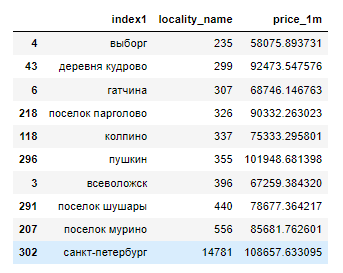

 Самым дорогим во всем датасете оказался Шлиссельбург- средняя стоимость одного квадрата 115 тыс.руб. Самый дешевый в Бокситогорск- цена за квадратный метр обойдется в 11 тыс.руб

**Цены на каждый километр в срезе Санкт-Петербурга**

 Также мы сделали вывод, ценник показывает спад с удалением от центра, ярко выражены пики на 20 и 27 км. Связать это можно все с премиальными ЖК на данном удалении.